# A Simple Neural Network

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Input, Dropout
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import to_categorical
np.random.seed(1671) # for reproducibility
tf.config.run_functions_eagerly(True)

Setup base network and training variables

In [25]:
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION

Shuffle the data and split between train and test sets.

X_train -> 60_000 28x28 images

y_train -> 60_000 labels (0-9)

X_test  -> 10_000 28x28 images

y_test  -> 10_000 labels (0-9) 

In [26]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Sample image

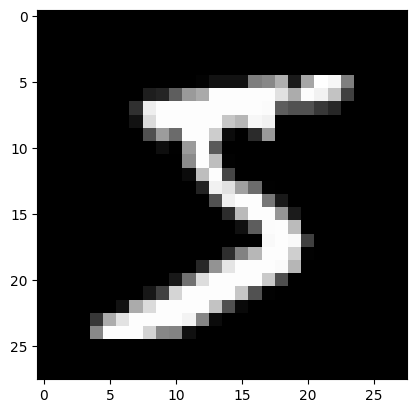

In [27]:
plt.imshow(X_train[0], cmap='grey')

Reshape the data, normalize it, and convert the data type to 32 bit floating number for optimal GPU processing

X_train is 60_000 rows of 28x28 values --> reshaped to 60_000 x 784

X_test is 10_000 rows of 28x28 values --> reshaped to 10_000 x 784

In [28]:
RESHAPED = 784
X_train = X_train.reshape(60_000, RESHAPED)
X_test = X_test.reshape(10_000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


Convert class vectors to binary class matrices

In [29]:
Y_train = to_categorical(y_train, NB_CLASSES)
Y_test = to_categorical(y_test, NB_CLASSES)

Configure the model and print a summary

In [30]:
model = Sequential()
model.add(Input(shape=(RESHAPED,)))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model

In [31]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=OPTIMIZER,
    metrics=['accuracy']
)

Run the training

In [32]:
history = model.fit(
    X_train,
    Y_train,
    batch_size=BATCH_SIZE,
    epochs=NB_EPOCH,
    verbose=VERBOSE,
    validation_split=VALIDATION_SPLIT
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4456 - loss: 1.8656 - val_accuracy: 0.8357 - val_loss: 0.7321
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8416 - loss: 0.6592 - val_accuracy: 0.8829 - val_loss: 0.4509
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8789 - loss: 0.4548 - val_accuracy: 0.8969 - val_loss: 0.3729
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8927 - loss: 0.3826 - val_accuracy: 0.9072 - val_loss: 0.3342
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9044 - loss: 0.3429 - val_accuracy: 0.9131 - val_loss: 0.3100
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9086 - loss: 0.3240 - val_accuracy: 0.9173 - val_loss: 0.2935
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9138 - loss: 0.3058 - val_accuracy: 0.9219 - val_loss: 0.2797
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9174 - loss: 0.2898 - val_accuracy: 0.

Evaluate the model

In [33]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.9358 - loss: 0.2216


# Experiment 1

- Adding a Dropout of 0.3

- Increasing number epochs to 250

Setup base network and training variables.

A DROPOUT of 0.3 is added and NB_EPOCH is increased to 250

In [55]:
NB_EPOCH = 250
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

Configure model with Dropout

In [56]:
model_with_dropout_03 = Sequential()
model_with_dropout_03.add(Input(shape=(RESHAPED,)))
model_with_dropout_03.add(Dense(N_HIDDEN))
model_with_dropout_03.add(Activation('relu'))
model_with_dropout_03.add(Dropout(DROPOUT))
model_with_dropout_03.add(Dense(N_HIDDEN))
model_with_dropout_03.add(Activation('relu'))
model_with_dropout_03.add(Dropout(DROPOUT))
model_with_dropout_03.add(Dense(NB_CLASSES))
model_with_dropout_03.add(Activation('softmax'))
model_with_dropout_03.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model with Dropout

In [57]:
model_with_dropout_03.compile(
    loss='categorical_crossentropy',
    optimizer=OPTIMIZER,
    metrics=['accuracy']
)

Run the training

In [58]:
history = model_with_dropout_03.fit(
    X_train,
    Y_train,
    batch_size=BATCH_SIZE,
    epochs=NB_EPOCH,
    verbose=VERBOSE,
    validation_split=VALIDATION_SPLIT
)

Epoch 1/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2954 - loss: 2.0337 - val_accuracy: 0.8018 - val_loss: 0.9221
Epoch 2/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6856 - loss: 1.0314 - val_accuracy: 0.8731 - val_loss: 0.5387
Epoch 3/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7743 - loss: 0.7323 - val_accuracy: 0.8890 - val_loss: 0.4287
Epoch 4/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8100 - loss: 0.6172 - val_accuracy: 0.8976 - val_loss: 0.3761
Epoch 5/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8354 - loss: 0.5519 - val_accuracy: 0.9053 - val_loss: 0.3390
Epoch 6/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8468 - loss: 0.5114 - val_accuracy: 0.9107 - val_loss: 0.3160
Epoch 7/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8554 - loss: 0.4801 - val_accuracy: 0.9136 - val_loss: 0.2987
Epoch 8/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8692 - loss: 0.4464 - val_accu

Evaluate the model

In [59]:
score = model_with_dropout_03.evaluate(X_test, Y_test, verbose=VERBOSE)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9749 - loss: 0.0846


# Experiment 2

- Adding a dropout of 0.3

- Setting number of epochs to 20

- Changing the optimiser to RMSprop

Setup base network and training variables.

A DROPOUT of 0.3 is added, and NB_EPOCH is set to 250, and OPTIMIZER is set to RMSprop

In [61]:
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = RMSprop()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

Configure the model with dropout and RMSprop optimizer

In [62]:
model_with_rmsprop = Sequential()
model_with_rmsprop.add(Input(shape=(RESHAPED,)))
model_with_rmsprop.add(Dense(N_HIDDEN))
model_with_rmsprop.add(Activation('relu'))
model_with_rmsprop.add(Dropout(DROPOUT))
model_with_rmsprop.add(Dense(N_HIDDEN))
model_with_rmsprop.add(Activation('relu'))
model_with_rmsprop.add(Dropout(DROPOUT))
model_with_rmsprop.add(Dense(NB_CLASSES))
model_with_rmsprop.add(Activation('softmax'))
model_with_rmsprop.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Compile model

In [64]:
model_with_rmsprop.compile(
    loss='categorical_crossentropy',
    optimizer=OPTIMIZER,
    metrics=['accuracy']
)

Run the training

In [65]:
history = model_with_rmsprop.fit(
    X_train,
    Y_train,
    batch_size=BATCH_SIZE,
    epochs=NB_EPOCH,
    verbose=VERBOSE,
    validation_split=VALIDATION_SPLIT
)

Epoch 1/20
 10/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2093 - loss: 2.1586

/Users/aidanfarhi/Learning/school/cs-370/.venv/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7518 - loss: 0.7846 - val_accuracy: 0.9477 - val_loss: 0.1781
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9261 - loss: 0.2450 - val_accuracy: 0.9553 - val_loss: 0.1509
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9462 - loss: 0.1831 - val_accuracy: 0.9642 - val_loss: 0.1211
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9542 - loss: 0.1520 - val_accuracy: 0.9691 - val_loss: 0.1065
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9621 - loss: 0.1300 - val_accuracy: 0.9692 - val_loss: 0.1035
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9642 - loss: 0.1165 - val_accuracy: 0.9719 - val_loss: 0.1004
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9673 - loss: 0.1065 - val_accuracy: 0.9739 - val_loss: 0.0896
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9699 - loss: 0.0999 - val_accuracy: 0.974

evaluate the model

In [66]:
score = model_with_rmsprop.evaluate(X_test, Y_test, verbose=VERBOSE)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9742 - loss: 0.1009


# Experiment 3

- Adding a dropout of 0.3

- Setting number of epochs to 20

- Changing the optimiser to Adam

Setup base network and training variables.

A DROPOUT of 0.3 is added, and NB_EPOCH is set to 20, and OPTIMIZER is set to Adam

In [67]:
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = Adam()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

Configure the model with 0.3 dropout and Adam optimizer

In [68]:
model_with_adam = Sequential()
model_with_adam.add(Input(shape=(RESHAPED,)))
model_with_adam.add(Dense(N_HIDDEN))
model_with_adam.add(Activation('relu'))
model_with_adam.add(Dropout(DROPOUT))
model_with_adam.add(Dense(N_HIDDEN))
model_with_adam.add(Activation('relu'))
model_with_adam.add(Dropout(DROPOUT))
model_with_adam.add(Dense(NB_CLASSES))
model_with_adam.add(Activation('softmax'))
model_with_adam.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_32 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model

In [69]:
model_with_adam.compile(
    loss='categorical_crossentropy',
    optimizer=OPTIMIZER,
    metrics=['accuracy']
)

Run training

In [70]:
history = model_with_adam.fit(
    X_train,
    Y_train,
    batch_size=BATCH_SIZE,
    epochs=NB_EPOCH,
    verbose=VERBOSE,
    validation_split=VALIDATION_SPLIT
)

Epoch 1/20
  9/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.1893 - loss: 2.2382

/Users/aidanfarhi/Learning/school/cs-370/.venv/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7342 - loss: 0.8482 - val_accuracy: 0.9479 - val_loss: 0.1822
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9293 - loss: 0.2455 - val_accuracy: 0.9593 - val_loss: 0.1345
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9477 - loss: 0.1811 - val_accuracy: 0.9643 - val_loss: 0.1147
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9540 - loss: 0.1526 - val_accuracy: 0.9675 - val_loss: 0.1059
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9612 - loss: 0.1277 - val_accuracy: 0.9700 - val_loss: 0.0988
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9646 - loss: 0.1145 - val_accuracy: 0.9707 - val_loss: 0.0947
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9674 - loss: 0.1055 - val_accuracy: 0.9728 - val_loss: 0.0877
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9698 - loss: 0.0940 - val_accuracy: 0.975

Evaluate the model

In [71]:
score = model_with_adam.evaluate(X_test, Y_test, verbose=VERBOSE)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9767 - loss: 0.0957
